# Exploratory Data Analysis

## Housekeeping

In [4]:
# Set working directory
import os
import re

try:
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/MyDrive/ds1_nhanes/')
except:
  from pathlib import Path
  if not re.search(r'ds1_nhanes$', str(os.getcwd())):
    os.chdir(Path(os.getcwd()).parent)

print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1-4PHX9XhMUWpi_lTsGHtTyz6s3O0u5a2/ds1_nhanes


In [5]:
# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load dataset
df = pd.read_csv('data/clean/nhanes_2017_2023_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19386 entries, 0 to 19385
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       19386 non-null  int64  
 1   weight_2d                  19386 non-null  float64
 2   grams                      19386 non-null  float64
 3   f_total_(cup_eq)           19386 non-null  float64
 4   f_citmlb_(cup_eq)          19386 non-null  float64
 5   f_other_(cup_eq)           19386 non-null  float64
 6   f_juice_(cup_eq)           19386 non-null  float64
 7   v_total_(cup_eq)           19386 non-null  float64
 8   v_drkgr_(cup_eq)           19386 non-null  float64
 9   v_redor_total_(cup_eq)     19386 non-null  float64
 10  v_redor_tomato_(cup_eq)    19386 non-null  float64
 11  v_redor_other_(cup_eq)     19386 non-null  float64
 12  v_starchy_total_(cup_eq)   19386 non-null  float64
 13  v_starchy_potato_(cup_eq)  19386 non-null  flo

In [7]:
# Check prop_pbp summary stats
df[['SEQN', 'oz_pbp', 'pf_total_(oz_eq)', 'prop_pbp']].describe()

,SEQN,oz_pbp,pf_total_(oz_eq),prop_pbp
count,19386.000000,19386.000000,19386.000000,18877.000000
mean,123798.132054,3.607962,10.380507,0.248736
std,10059.760136,6.382678,8.096582,0.285101
min,109263.000000,0.000000,0.000000,0.000000
25%,115314.250000,0.000000,4.810000,0.000000
50%,121282.500000,0.870000,8.690000,0.134887
75%,133658.750000,4.580000,13.860000,0.444676
max,142310.000000,79.110000,100.960000,1.000000


## PBP Consumption

Big caveat here is that we are comparing the ounces of PBPs consumed to the ounces of total proteins consumed, and these are probably definitely not the same thing. At some point we should probably pull grams of protein from the NHANES data rather than using the FPED as our basis of comparison on PBP consumption.

Set a common theme for our plots:

In [8]:
sns.set_theme(
    style="ticks",
    rc= {
      "axes.spines.right": False,
      "axes.spines.top": False,
      "figure.figsize": (6, 5)
    }
  )

Proportion of PBP consumption out of total protein consumption by gender. Note that we are using the 2-day weights

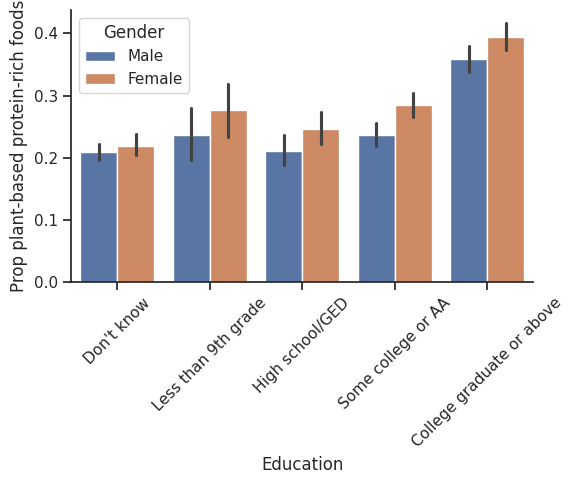

In [9]:
# prop pbp consumption by gender
ax = sns.barplot(
  data=df,
  y='prop_pbp',
  x='education',
  hue='gender',
  order=[
    "Don't know",
    'Less than 9th grade',
    'High school/GED',
    'Some college or AA',
    'College graduate or above'
  ],
  weights='weight_2d',
  errorbar=('ci', 95)
)
ax.set(
  ylabel = 'Prop plant-based protein-rich foods',
  xlabel = 'Education'
  # title = 'Proportion of protein-rich foods from plants by education'
)
ax.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot
plt.savefig('outputs/checkin_1/pbp_by_education.png')

plt.show()
# Would like to adjust names horizontally to line up better after rotation,
# but no hjust arg?

Something to double check - are there children in the NHANES survey? Splitting by education could have pretty different meanings if there are.

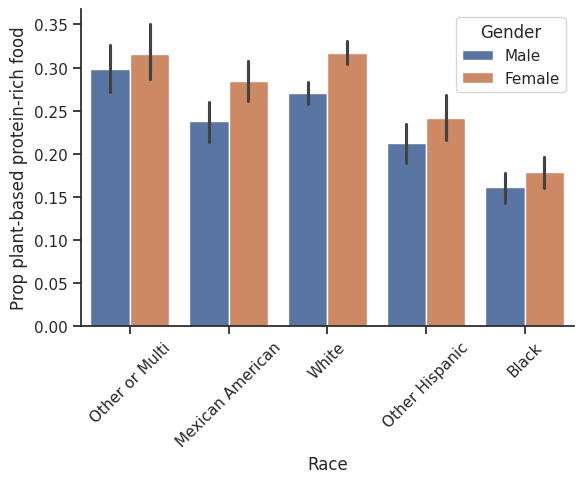

In [10]:
# pbp consumption by race
ax = sns.barplot(
  data=df,
  y='prop_pbp',
  x='race',
  hue='gender',
  weights='weight_2d',
  errorbar=('ci', 95)
)
ax.set(
  xlabel = 'Race',
  ylabel = 'Prop plant-based protein-rich food'
  # title = 'Proportion of protein-rich food from plants by race'
)
ax.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()

# Save it
plt.savefig('outputs/checkin_1/pbp_by_race.png')

# Show it
plt.show()

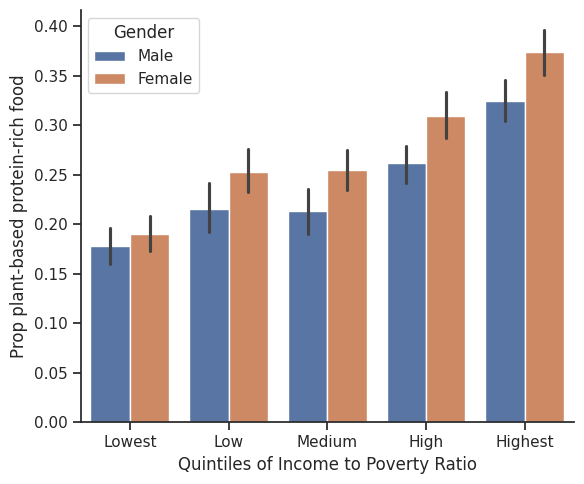

In [11]:
# pbp consumption by poverty ratio
ax = sns.barplot(
  data = df,
  y='prop_pbp',
  x='income_ratio_qs',
  hue='gender',
  weights='weight_2d',
  errorbar=('ci', 95),
  order=[
      'Lowest',
      'Low',
      'Medium',
      'High',
      'Highest'
  ]
)
ax.set(
  xlabel = 'Quintiles of Income to Poverty Ratio',
  ylabel = 'Prop plant-based protein-rich food'
  # title = 'Proportion of protein-rich food from plants by income'
)
ax.legend(title='Gender')
plt.tight_layout()

# Save it
plt.savefig('outputs/checkin_1/pbp_by_income.png')

# Show it
plt.show()

This one is pretty interesting!

## Test a Table

Just figuring out how to make a LaTeX table

In [12]:
# Make a smaller DF to play around with
small_df = df[['SEQN', 'weight_2d', 'gender', 'prop_pbp']].head()
print(small_df)

     SEQN  weight_2d  gender  prop_pbp
0  109263    8904.03    Male  0.242092
1  109264    3626.88  Female  0.037090
2  109265   17806.00    Male  0.004137
3  109266    2994.10  Female  0.360656
4  109269    9115.96    Male  0.000000


In [13]:
# Rename columns to ditch underscores (which break in LaTeX)
small_df.columns = ['SEQN', 'Weight', 'Gender', 'Prop PBP']
print(small_df)

     SEQN    Weight  Gender  Prop PBP
0  109263   8904.03    Male  0.242092
1  109264   3626.88  Female  0.037090
2  109265  17806.00    Male  0.004137
3  109266   2994.10  Female  0.360656
4  109269   9115.96    Male  0.000000


In [14]:
small_df.to_latex(
  'outputs/checkin_1/test_table.tex', # file path
  index=False, # no row numbers
  float_format="%.2f", # round to 2 digits
  label='test_table', # how we reference it in the text
  caption='This is a test table', # What it says after table number
  position='h' # h is for 'here', tries to put it immediately after the
  # reference, but it reserves some license to move it around so that it fits
)

## Summary Table

Maybe?

In [15]:
# Lump each category - fruits, grains, proteins and fats, dairy
food_groups = df.filter(regex='^[fgpd][f_](?!.*calc$)')
categories = ['fruit', 'grain', 'protein', 'dairy']

# For each category, make a column in groups_df
# groups_df = df.loc[:, ['weight_2d', 'gender', 'age', 'race', 'education', 'income_ratio_qs']]
groups_df = df.loc[:, ['weight_2d']]

for cat in categories:
  initial = cat[0]
  cols = food_groups.columns[food_groups.columns.str.startswith(initial)]
  groups_df[cat] = food_groups[cols].sum(axis=1)

groups_df.head()

,weight_2d,fruit,grain,protein,dairy
0,8904.03,3.20,31.98,22.58,6.92
1,3626.88,0.00,39.70,41.08,6.47
2,17806.00,4.56,21.44,28.72,7.60
3,2994.10,1.74,22.30,5.64,8.30
4,9115.96,0.08,26.78,5.12,6.55


In [16]:
import statsmodels.api as sm

data = sm.add_constant(groups_df['weight_2d'])

for cat in categories:
  desc_stats = sm.stats.DescrStatsW(groups_df[cat], weights=df['weight_2d'])
  print(f'{cat} mean: {desc_stats.mean.round(3)}')
  print(f'{cat} std: {desc_stats.std.round(3)}')

fruit mean: 2.931
fruit std: 3.236
grain mean: 29.411
grain std: 15.555
protein mean: 30.836
protein std: 19.846
dairy mean: 5.897
dairy std: 5.225


In [17]:
memory_usage = df.memory_usage(deep=True).sum()
memory_usage_mb = memory_usage / (1024 ** 2)
print(memory_usage_mb)

11.44880485534668


In [18]:
df.isnull().mean()

,0
SEQN,0.000000
weight_2d,0.000000
grams,0.000000
f_total_(cup_eq),0.000000
f_citmlb_(cup_eq),0.000000
f_other_(cup_eq),0.000000
f_juice_(cup_eq),0.000000
v_total_(cup_eq),0.000000
v_drkgr_(cup_eq),0.000000
v_redor_total_(cup_eq),0.000000


/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='age', ylabel='Count'>

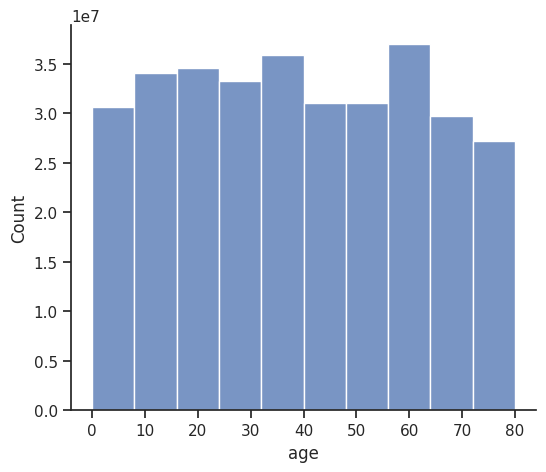

In [19]:
sns.histplot(
    data=df,
    x='age',
    weights='weight_2d'
)